In this project, we will use machine learning to complete a single word speech recognition task.  Here, we use one second recordings of the digits zero - nine from the Google Speech Command database https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html, meaning that every recording used belongs to one of ten classes (zero, one, two, three, four, five, six, seven, eight, or nine).  To perform the recognition, we have two frameworks as shown below:

1. We can directly feed the audio signal into a neural network for audio classification.  Models that read in the raw signal with no feature extraction are called end to end models.

2. We can extract some short time feature from each frame of the audio, giving the spectrogram or another acoustic representation.  We can then take these combination of these features accross time as an image and perform image classification on them.


In this project, you will explore both methods.

You may (but are not required) to change any of the code given here.  You can just add your new code to the bottom of the file.

**Before you run anything, go to the toolbar at the top and select: Runtime > Change runtime type > GPU.**

Mount your google drive to give google colab access to files stored in your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Change directory to the place where the google ai speech commands dataset is stored.  You can find the path by typing "!ls" to see what files and directories are currently available.  Then type "!ls <subdirectory you want to explore>" to see what files are in the next subdirectory.  Keep doing that, separating the subdirectories with slashes "/" until you get to the speech_commands_v0.01 folder as shown below.  Then put that filepath in the os.chdir command.

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/speech_commands_v0.01')
!ls

Load in the text file that lists the audio files to be used.  We'll only use the subset of files listed in this text file for this project.

In [ ]:
text_file = open("train_digit_list.txt", "r")
training_list = text_file.read().splitlines()

Read in all of the audio files.  Store the raw audio to a list called all_wav_list.  Store any features extracted to a listt called all_feat_list.  This part may take a while depending on what features you extract.  You can go watch netflix or work on your homework or something and come back when it's done>  You have to redo this every time you run the code which can be kind of a pain.  If you prefer, you can store the list after you've generated it and then redownload it instead of recreating it:

# Create NN

import pickle

# Create a list

l = [1,2,3,4] # create a list
#store the list as a file
    with open("test.txt", "wb") as fp:   #Pickling
        pickle.dump(l, fp)
# open the file and read the list from it 
    with open("test.txt", "rb") as fp:   # Unpickling
        b = pickle.load(fp)

In [ ]:
!pip install librosa==0.8.0

In [ ]:
import librosa.feature as lf
import scipy.io.wavfile as wav
import numpy as np
from tqdm.notebook import tnrange

#initialize lists
all_wav_list = []
all_feat_list = []
all_feat_list2 = []
all_feat_list3 = []
all_feat_list4 = []
all_feat_list5 = []
all_feat_list6 = []
all_feat_list7 = []
all_feat_list8 = []
all_feat_list9 = []
all_feat_list10 = []
all_feat_list11 = []
all_feat_list12 = []
all_labels = []

#loop through all audio files listed in the text file
for i in tnrange(len(training_list), desc='Load in files'):
  #load in the given audio file
  fs, audio = wav.read(training_list[i])

  
  z=np.zeros((fs,))
  #if an audio file is less than a second, add zeros to it to make it a second
  if audio.size<=fs:
    z[:audio.size]=audio
  # if an audio file is longer than a second, clip it to a second
  elif audio.size>fs:
    z=audio[:fs]
  
  # read in five features
  feat = lf.melspectrogram(z.astype('float'), sr =fs)
  feat2 = lf.mfcc(z.astype('float'), sr=fs, n_fft=512)

  feat1= lf.poly_features(z.astype('float'),sr=fs, n_fft=512)
  feat3=np.vstack((feat1, feat1, feat1, feat1, feat1))

  feat1= lf.spectral_centroid(z.astype('float'), sr =fs)
  feat4=np.vstack((feat1, feat1, feat1, feat1, feat1, feat1, feat1, feat1))
  
  feat1= lf.spectral_contrast(z.astype('float'), sr =fs)
  feat5=np.vstack((feat1, feat1, feat1, feat1, feat1, feat1, feat1, feat1))

  #Altered Mel Spectrogram Parameters
  feat6 = lf.melspectrogram(z.astype('float'), sr = fs, win_length = 1024)
  
  feat7 = lf.melspectrogram(z.astype('float'), sr = fs, win_length = 1024, hop_length = 1024)
  
  feat8 = lf.melspectrogram(z.astype('float'), sr = fs, win_length = 512, hop_length = 1024)

  #Combined Features
  feat9 = np.vstack((feat2, feat4))

  feat10 = np.vstack((feat2, feat))

  feat11 = np.vstack((feat, feat4))

  feat12 = np.vstack((feat2, feat4, feat))

  all_wav_list.append(z.astype('float'))
  all_feat_list.append(feat.reshape(1, feat.shape[0], feat.shape[1]))
  all_feat_list2.append(feat2.reshape(1, feat2.shape[0], feat2.shape[1]))
  all_feat_list3.append(feat3.reshape(1, feat3.shape[0], feat3.shape[1]))
  all_feat_list4.append(feat4.reshape(1, feat4.shape[0], feat4.shape[1]))
  all_feat_list5.append(feat5.reshape(1, feat5.shape[0], feat5.shape[1]))
  all_feat_list6.append(feat6.reshape(1, feat6.shape[0], feat6.shape[1]))
  all_feat_list7.append(feat7.reshape(1, feat7.shape[0], feat7.shape[1]))
  all_feat_list8.append(feat8.reshape(1, feat8.shape[0], feat8.shape[1]))
  all_feat_list9.append(feat9.reshape(1, feat9.shape[0], feat9.shape[1]))
  all_feat_list10.append(feat10.reshape(1, feat10.shape[0], feat10.shape[1]))
  all_feat_list11.append(feat11.reshape(1, feat11.shape[0], feat11.shape[1]))
  all_feat_list12.append(feat12.reshape(1, feat12.shape[0], feat12.shape[1]))
  

# get labels from the file name (ie which word is in the audio file)
  which_word=training_list[i].split('/')[0]
  all_labels.append(which_word)



Let's listen to one of the audio files to verify that it loaded in correctly

In [ ]:
import IPython
IPython.display.Audio(training_list[0])

And verify that the sizes of the lists look correct

In [ ]:
print(len(all_wav_list))
print(len(all_feat_list))
print(len(all_labels))
print(all_feat_list[0].shape)

Now we'll start with speech recognition from the raw audio.  We'll concatenate the raw signals into a matrix X_sig.

In [ ]:
X_sig = np.vstack(all_wav_list)
X_sig = X_sig.reshape(X_sig.shape[0], X_sig.shape[1], 1)
print(X_sig.shape)

And we'll one hot encode our labels.  This will transform our labels from words to a vector that represents the label with a numerical value.  All of the encoded labels will have the same norm to prevent bias.  For instance, if there were five words then they would be encoded as:

$y1 = [1, 0, 0, 0, 0]$

$y2 = [0, 1, 0, 0, 0]$

$y3 = [0, 0, 1, 0, 0]$

$y4 = [0, 0, 0, 1, 0]$

$y5 = [0, 0, 0, 0, 1]$

This will be useful in comparing correct and incorrect labels later

In [ ]:
from sklearn import preprocessing
import scipy as sp

le = preprocessing.LabelEncoder()
le.fit(all_labels)
encoded_labels = le.transform(all_labels)

oh_enc = preprocessing.OneHotEncoder()
oh_enc.fit(encoded_labels.reshape(-1,1))

y = oh_enc.transform(encoded_labels.reshape(-1,1))
y = sp.sparse.csr_matrix.toarray(y)

Then we'll devide the whole set into a testing and a training set.

In [ ]:
from sklearn.model_selection import train_test_split

X_sig_train, X_sig_test, y_train, y_test = train_test_split(X_sig, y, test_size=0.2, random_state=42)

Create and run an end to end model for audio classification:  We create a sequential model using the keras module in tensorflow and then add the desired layer to it.

The graph is created of a static size, so the size of every layer must be pre-defined.  Tensorflow will take care of calculated the sizes needed in each layer if we specify the size of the input layer, the size of the output layer, and the parameters of each desired layers.

The input is a collection of 1D signals each one second long.  The static graph requires that all inputs be the same size which we make sure of in shaping the input matrix above.  This will have the shape (number_of_signals, len_of_signals, 1).  The number of signals we feed into the network does not affect its structure, so we just need to specify the shapes of these inputs in input layer as (fs, 1) for the one second long signals.

This input is then passed into convolutional layers and then recurrent layers (GRU) before the fully connected network (ie multilayer perceptrion) makes the final output decision.  In betweek the layers are forms of regularization such as MaxPooling (downsampling the output of a layer), dropout(randomly setting some percentage of the weights of a layer to zero for given iteration), and batch normalization (normalizing the mean and standard deviation of the output of a layer so that the numbers don't become too large).  These methods try to ensure that the solution found by the neural network does not rely too strongly on any one trend that occurs in its weights or any trend that only occurs with a small numbe of its weights.  This helps ensure that the solution found by the network is not too specific to the training data and generalizes well to any other test set of a similar distribution.

At the output layer, we set the size of the last fully connected layer to 10 to let the network know that we expect a classification decision between one of the ten classes.  The output of the last layer is of the form:

$out=[x_0, x_1, x_2, x_3, x_4,x_5,x_6,x_7,x_8,x_9]$

where each $x_i$ is the calculated probability that the given audio sample belongs to class i.  The classification decision is then $y_{pred} =argmax_i(out)$ which we compare to the actual labels stored in the actual $y_{test}$.

In [ ]:
import tensorflow as tf

model_e2e = tf.keras.models.Sequential()
model_e2e.add(tf.keras.Input(shape=(fs,1))) #Make sure that the input size is the size of the signal
model_e2e.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True, )) #adjust input to unit variance and zero mean
#First Conv1D layer
model_e2e.add(tf.keras.layers.Conv1D(8,13, padding='valid', activation='relu', strides=1)) #Convolve with 8 1D kernels of length 13
model_e2e.add(tf.keras.layers.MaxPooling1D(3)) #Downsample - take the max out of every three elements
model_e2e.add(tf.keras.layers.Dropout(0.3)) #drop nodes with probability 0.3
#Second Conv1D layer
model_e2e.add(tf.keras.layers.Conv1D(16, 11, padding='valid', activation='relu', strides=1)) #Convolve with 16 1D kernels of length 11
model_e2e.add(tf.keras.layers.MaxPooling1D(3))
model_e2e.add(tf.keras.layers.Dropout(0.3))
#Third Conv1D layer
model_e2e.add(tf.keras.layers.Conv1D(32, 9, padding='valid', activation='relu', strides=1))
model_e2e.add(tf.keras.layers.MaxPooling1D(3))
model_e2e.add(tf.keras.layers.Dropout(0.3))
model_e2e.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True))
model_e2e.add(tf.keras.layers.Bidirectional(tf.python.keras.layers.CuDNNGRU(128, return_sequences=True), merge_mode='sum')) #Recurrent layer, uses time series data
model_e2e.add(tf.keras.layers.Bidirectional(tf.python.keras.layers.CuDNNGRU(128, return_sequences=True), merge_mode='sum'))
model_e2e.add(tf.keras.layers.Bidirectional(tf.python.keras.layers.CuDNNGRU(128, return_sequences=False), merge_mode='sum')) #set return sequences to False for last recurrent layer
model_e2e.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True))
#Flatten layer
model_e2e.add(tf.keras.layers.Flatten()) # Turn 2D result of convolution to a single vector
#Dense Layer 1
model_e2e.add(tf.keras.layers.Dense(256, activation='relu')) #Fully connected layer
model_e2e.add(tf.keras.layers. Dense(10, activation="softmax")) #output layer, need size = num_classes
model_e2e.summary() #show breakdown of parameters

model_e2e.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy']) #decide loss function and metrics

hist = model_e2e.fit(
    x=X_sig_train, 
    y=y_train,
    epochs=50, 
    batch_size=32)


In [ ]:
model_e2e.evaluate(X_sig_test, y_test)

16/16 [==============================] - 5s 299ms/step - loss: 0.3848 - accuracy: 0.8878


[0.38484877347946167, 0.8877755403518677]

Now we'll move on to performing speech recognition by identifying the image of the spectrogram.  We'll begon by concatenating the features extracted into a matrix

In [ ]:
X_im = np.vstack(all_feat_list)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

(2494, 128, 32, 1)


Let's view an image of our features

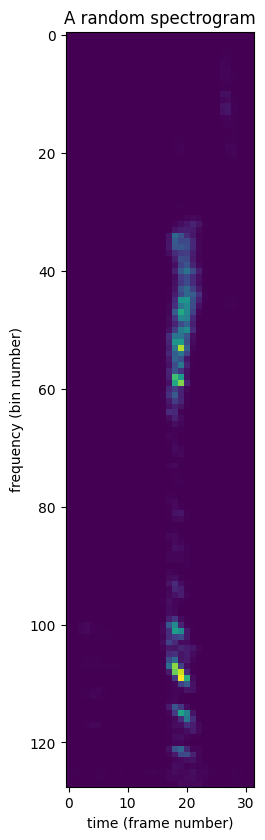

In [ ]:
import matplotlib.pyplot as plt
im = X_im[100,:,:].reshape(X_im.shape[1],X_im.shape[2])
im=im[::-1,:]
plt.figure(figsize=(20,10), dpi=100)
plt.imshow(im)
plt.ylabel('frequency (bin number)')
plt.xlabel('time (frame number)')
plt.title('A random spectrogram');


We'll similarly split our whole set into testing and training sets

In [ ]:
from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

Here we similarly train a CNN to recognize the images generated from the speech signals.  We again create the sequential model, and specify the input size in the first layer.

The imput matrix contains a collection of 2D signals.  Here the input matrix is of the shape (number_of_images, number_of_features (or height of each image), number_of_frames (or width of each image), 1).  If these were color RGB images, then we would need to replace the 1 with a 3 to let the network know that the signals have a depth of 3.  We will stick with grayscale images for simplicity.  We tell the network to expect some number of images with a shape of (num_features, num_timesteps, 1) as the input here.

This input is then passed into multiple 2D convolutional layers with maxpooling as regularization between.  This 2D maxpooling downsamples accross both the x and y dimensions of the image.

The output of the last conv layer is then flattened into a 1D vector and passed to the multilayer perceptiron for a final classification decision in the same way as in the end to end model.

In [ ]:

import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 5ms/step - loss: 43843340.0000 - accuracy: 0.2124


[43843340.0, 0.2124248445034027]

Now that we've run this experiment on clean, noise-free signals taken with high quality microphones, and recorded by speakers all with similar speaking styles and accents, let's explore a less ideal case.  In real life, you can rarely expect the input speech to be of such high quality and need to prepare to handle common degradations in the signals.  There could be additive, noise in the background, there could be multiple speakers talking over each other, a speaker could have an accent not present in the training data, etc..  We need to be creative in how we deal with these challenges.  Here we'll introduce another common problem in audio processing: Reverberation.  Reverberations, or echos, occur when not only the original signal reaches the recording device, but also reflections of the soundwave off of nearby surfaces are directed at the microphone and also appear in the signal.  This can be modeled as multiple delayed and attenuated versions of the original signal being added back into the original signal through convolution with a room impulse function.  For this reason, we often refer to reverberations as convolutional noise, as opposed to addative noise which is added on top of the signal

Install the pyroomacoustics library.  It is a helpful python library that deals with calculating the effects of echos in a given

In [ ]:
!pip install pyroomacoustics

     |████████████████████████████████| 1.1MB 13.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/00/84/fc9dc13ee536ba5e6b8fd10ce368fea5b738fe394c3b296cde7c9b144a92/pybind11-2.6.1-py2.py3-none-any.whl
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.4.2-cp36-cp36m-linux_x86_64.whl size=9535050 sha256=36377a0795704c12791781e52087be285f410e1ccfd1fede74e81e81fea637e3
  Stored in directory: /root/.cache/pip/wheels/a8/36/c1/e2c6c0c9a018975e20f7c4694ee1d19f768ac7b3aba168231a
Successfully built pyroomacoustics


Read in a new test set from another text file

In [ ]:
text_file = open("testing_digit_list.txt", "r")
testing_list = text_file.read().splitlines()

Add reverberations to the test signals using the pyroom acoustic library

In [ ]:
from tqdm.notebook import tnrange
import pyroomacoustics as pra
import scipy.io.wavfile as wav
import numpy as np
import librosa.feature as lf

all_reverb_signals =[]
all_reverb_feat=[]
all_reverb_feat2=[]
all_reverb_feat3=[]
all_reverb_feat4=[]
all_reverb_feat5=[]
all_reverb_feat6=[]
all_reverb_feat7=[]
all_reverb_feat8=[]
all_reverb_feat9=[]
all_reverb_feat10=[]
all_reverb_feat11=[]
all_reverb_feat12=[]
trial_labels = []

# The desired reverberation time and dimensions of the room
rt60 = 1.0  # seconds
room_dim = [20, 30, 10]  # meters

e_absorption, max_order = pra.inverse_sabine(rt60, room_dim)

# Create the room
for i in tnrange(len(testing_list)):

  fs, audio = wav.read(testing_list[i])
  room = pra.ShoeBox(
      room_dim, fs=fs, materials=pra.Material(e_absorption), max_order=max_order
  )

  # place the source in the room
  room.add_source([2.5, 3.73, 1.76], signal=audio, delay=1.3)

  mic_locs = np.c_[
      [10, 1, 1], 
  ]

  # finally place the array in the room
  room.add_microphone_array(mic_locs)

  # Run the simulation (this will also build the RIR automatically)
  room.simulate()

  mics_signals = room.mic_array.signals
  mics_signals = mics_signals.reshape(mics_signals.size,)
  z=mics_signals[int(1.5*fs):int(2.5*fs)]

  # five features
  feat = lf.melspectrogram(z.astype('float'), sr =fs)
  feat2 = lf.mfcc(z.astype('float'), sr=fs, n_fft=512)

  feat1= lf.poly_features(z.astype('float'),sr=fs, n_fft=512)
  feat3=np.vstack((feat1, feat1, feat1, feat1, feat1))

  feat1= lf.spectral_centroid(z.astype('float'), sr =fs)
  feat4=np.vstack((feat1, feat1, feat1, feat1, feat1, feat1, feat1, feat1))
  
  feat1= lf.spectral_contrast(z.astype('float'), sr =fs)
  feat5=np.vstack((feat1, feat1, feat1, feat1, feat1, feat1, feat1, feat1))

  #Altered Mel Spectrogram Parameters
  feat6 = lf.melspectrogram(z.astype('float'), sr = fs, win_length = 1024)
  
  feat7 = lf.melspectrogram(z.astype('float'), sr = fs, win_length = 1024, hop_length = 1024)
  
  feat8 = lf.melspectrogram(z.astype('float'), sr = fs, win_length = 512, hop_length = 1024)

  #Combined Features
  feat9 = np.vstack((feat2, feat4))

  feat10 = np.vstack((feat2, feat))

  feat11 = np.vstack((feat, feat4))

  feat12 = np.vstack((feat2, feat4, feat))

  all_reverb_signals.append(z.astype('float'))
  all_reverb_feat.append(feat.reshape(1, feat.shape[0], feat.shape[1]))
  all_reverb_feat2.append(feat2.reshape(1, feat2.shape[0], feat2.shape[1]))
  all_reverb_feat3.append(feat3.reshape(1, feat3.shape[0], feat3.shape[1]))
  all_reverb_feat4.append(feat4.reshape(1, feat4.shape[0], feat4.shape[1]))
  all_reverb_feat5.append(feat5.reshape(1, feat5.shape[0], feat5.shape[1]))
  all_reverb_feat6.append(feat6.reshape(1, feat6.shape[0], feat6.shape[1]))
  all_reverb_feat7.append(feat7.reshape(1, feat7.shape[0], feat7.shape[1]))
  all_reverb_feat8.append(feat8.reshape(1, feat8.shape[0], feat8.shape[1]))
  all_reverb_feat9.append(feat9.reshape(1, feat9.shape[0], feat9.shape[1]))
  all_reverb_feat10.append(feat10.reshape(1, feat10.shape[0], feat10.shape[1]))
  all_reverb_feat11.append(feat11.reshape(1, feat11.shape[0], feat11.shape[1]))
  all_reverb_feat12.append(feat12.reshape(1, feat12.shape[0], feat12.shape[1]))

  # get labels from the file name (ie which word is in the audio file)
  which_word=testing_list[i].split('/')[0]
  trial_labels.append(which_word)
  


/usr/local/lib/python3.6/dist-packages/pyroomacoustics/room.py:905: UserWarning: The number of rays used for ray tracing is larger than100000 which may result in slow simulation.  The numberof rays was automatically chosen to provide accurateroom impulse response based on the room volume and thereceiver radius around the microphones.  The number ofrays may be reduced by increasing the size of thereceiver.  This tends to happen especially for largerooms with small receivers.  The receiver is a spherearound the microphone and its radius (in meters) may bespecified by providing the `receiver_radius` keywordargument to the `set_ray_tracing` method.
  "The number of rays used for ray tracing is larger than"


Encode the labels from the new dataset using the same encoding scheme used previously.

In [ ]:

le.fit(trial_labels)

encoded_labels = le.transform(trial_labels)

oh_enc = preprocessing.OneHotEncoder()
oh_enc.fit(encoded_labels.reshape(-1,1))

y_trial = oh_enc.transform(encoded_labels.reshape(-1,1))
y_trial = sp.sparse.csr_matrix.toarray(y_trial)

In [ ]:
print(len(all_reverb_signals),len(all_reverb_feat))

2552 2552


Listen to an audio signal with reverb

In [ ]:
IPython.display.Audio(all_reverb_signals[0], rate=fs)

Confirm the size of the test signals

In [ ]:
X_sig_rev=np.vstack(all_reverb_signals)
X_sig_rev=X_sig_rev.reshape(X_sig_rev.shape[0],X_sig_rev.shape[1],1)
print(X_sig_rev.shape)

(2552, 16000, 1)


In [ ]:
X_im_rev = np.vstack(all_reverb_feat)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat[0].shape)
print(X_im_rev.shape)

(1, 128, 32)
(2552, 128, 32, 1)


View an image with reverb

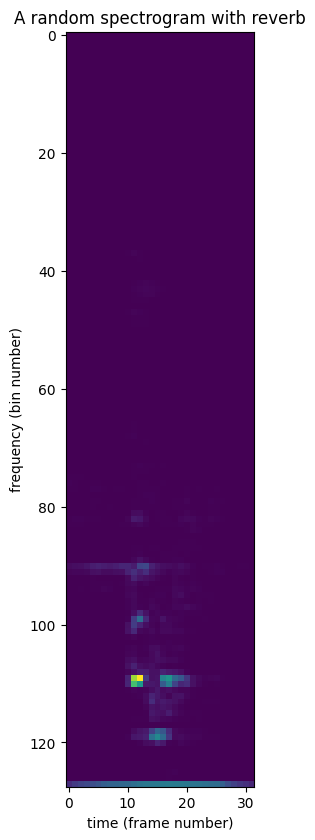

In [ ]:
im = X_im_rev[1,:,:].reshape(X_im_rev.shape[1],X_im_rev.shape[2])
im=im[::-1,:]
plt.figure(figsize=(20,10), dpi=100)
plt.imshow(im)
plt.ylabel('frequency (bin number)')
plt.xlabel('time (frame number)')
plt.title('A random spectrogram with reverb');

Now evaluate the performance of the models on the test sets with reverb.

In [ ]:
model_e2e.evaluate(X_sig_rev, y_trial)

80/80 [==============================] - 10s 127ms/step - loss: 1.7311 - accuracy: 0.4832


[1.7311031818389893, 0.4831504821777344]

In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 5ms/step - loss: 3816935.0000 - accuracy: 0.1673


[3816935.0, 0.16731974482536316]

We notice that the performance has worsened drastically with this degradation added to the signal  Your job in this project is to apply preprocessing to the reverberated signals as to give better performance in the networks.  Without changing the overall structure of the networks, process the reverberated signals to be more inteligible to a machine.  Think about what trends a machine will learn from the data and bring out those trends in the new test set.  Perform this for both networks.  For the end to end network, you should directly enhance the audio signals.  For the CNN, you can process the raw audio and then make your choice of feature (spectrogram, mfccs, lpcs, etc.) from the librosa library or any other library.  You can also concatenate features.  For this network, you may change the size of the input layer and retrain if your new features are of a different size than the original.  You can then apply image processing to the resulting images to the resulting image to enchance its ability to be classified correctly.  For each network, try at least 5 different processing techniques on the input signal.  Also try some combinations of those techniques and see if the combination of techniques is better or worse then the application of those techniques alone.  Submit all code at the bottom of this notebook.

Note that you may not:
1. Use additional audio files in training
2. Introduce any overlap between the files used for training and those used for testing
3. Add layers to any network (removing layers is fine)
4. Assume any knowledge about the room impulse generated or add the same reverb to any training data.

You should apply your knowledge of signal processing to enhance the reverberated signals for use by the neural network.

# Feature extraction

## MFCC feature

In [ ]:
X_im = np.vstack(all_feat_list2)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 20, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 8ms/step - loss: 1.4075 - accuracy: 0.5150


[1.4075109958648682, 0.5150300860404968]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat2)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat2[0].shape)
print(X_im_rev.shape)

(1, 20, 32)
(2552, 20, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 4ms/step - loss: 1.6562 - accuracy: 0.4024


[1.6561661958694458, 0.402429461479187]

## Poly features

In [ ]:
X_im = np.vstack(all_feat_list3)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 10, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 36.1944 - accuracy: 0.2084


[36.19437026977539, 0.20841683447360992]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat3)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat3[0].shape)
print(X_im_rev.shape)

(1, 10, 32)
(2552, 10, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 3ms/step - loss: 11.4802 - accuracy: 0.1285


[11.48015022277832, 0.12852664291858673]

## spectral contrast feature

In [ ]:
X_im = np.vstack(all_feat_list4)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 8, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 3.0586 - accuracy: 0.2946


[3.0586376190185547, 0.29458919167518616]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat4)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat4[0].shape)
print(X_im_rev.shape)

(1, 8, 32)
(2552, 8, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 3ms/step - loss: 2.5534 - accuracy: 0.1846


[2.5534188747406006, 0.1845611333847046]

## Spectral centroid feature

In [ ]:
X_im = np.vstack(all_feat_list5)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 56, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 8ms/step - loss: 1.9649 - accuracy: 0.2685


[1.9648633003234863, 0.26853707432746887]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat5)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat5[0].shape)
print(X_im_rev.shape)

(1, 56, 32)
(2552, 56, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 5ms/step - loss: 2.1947 - accuracy: 0.2218


[2.194725275039673, 0.22178682684898376]

## Mel Spectrogram - Window Length = 1024

In [ ]:
X_im = np.vstack(all_feat_list6)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 128, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 5ms/step - loss: 26406432.0000 - accuracy: 0.2705


[26406432.0, 0.27054107189178467]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat6)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat6[0].shape)
print(X_im_rev.shape)

(1, 128, 32)
(2552, 128, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 5ms/step - loss: 1932655.3750 - accuracy: 0.2312


[1932655.375, 0.2311912178993225]

## Mel Spectrogram - Window Length = 1024, Hop Length = 1024

In [ ]:
X_im = np.vstack(all_feat_list7)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 128, 16, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 10ms/step - loss: 44048712.0000 - accuracy: 0.1443


[44048712.0, 0.1442885845899582]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat7)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat7[0].shape)
print(X_im_rev.shape)

(1, 128, 16)
(2552, 128, 16, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 6ms/step - loss: 5724723.5000 - accuracy: 0.1552


[5724723.5, 0.1551724076271057]

## Mel Spectrogram - Window Length = 512, Hop Length = 1024

In [ ]:
X_im = np.vstack(all_feat_list8)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 128, 16, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 4ms/step - loss: 18375018.0000 - accuracy: 0.2044


[18375018.0, 0.20440882444381714]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat8)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat8[0].shape)
print(X_im_rev.shape)

(1, 128, 16)
(2552, 128, 16, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 4ms/step - loss: 2257649.5000 - accuracy: 0.1865


[2257649.5, 0.18652038276195526]

## MFCC + Spectral Centroid

In [ ]:
X_im = np.vstack(all_feat_list9)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 28, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 7ms/step - loss: 2.1821 - accuracy: 0.3667


[2.182142734527588, 0.36673346161842346]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat9)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat9[0].shape)
print(X_im_rev.shape)

(1, 28, 32)
(2552, 28, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 0s 4ms/step - loss: 2.3001 - accuracy: 0.3060


[2.3000547885894775, 0.30603447556495667]

## MFCC + Mel Spectrogram

In [ ]:
X_im = np.vstack(all_feat_list10)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 148, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 6ms/step - loss: 40952932.0000 - accuracy: 0.2425


[40952932.0, 0.24248497188091278]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat10)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat10[0].shape)
print(X_im_rev.shape)

(1, 148, 32)
(2552, 148, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 1s 7ms/step - loss: 3658176.5000 - accuracy: 0.1803


[3658176.5, 0.18025077879428864]

## Mel Spectrogram + Spectral Centroid

In [ ]:
X_im = np.vstack(all_feat_list11)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 136, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 12ms/step - loss: 31831336.0000 - accuracy: 0.1443


[31831336.0, 0.1442885845899582]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat11)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat11[0].shape)
print(X_im_rev.shape)

(1, 136, 32)
(2552, 136, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 1s 7ms/step - loss: 2239074.0000 - accuracy: 0.1579


[2239074.0, 0.15791535377502441]

## MFCC + Spectral Centroid + Mel Spectrogram

In [ ]:
X_im = np.vstack(all_feat_list12)
X_im=np.array(X_im.reshape(X_im.shape[0],X_im.shape[1],X_im.shape[2], 1))
print(X_im.shape) 

from sklearn.model_selection import train_test_split

X_im_train, X_im_test, y_train, y_test = train_test_split(X_im, y, test_size=0.2, random_state=42)

(2494, 156, 32, 1)


In [ ]:
import tensorflow as tf

n_features = X_im.shape[1]
time_steps = X_im.shape[2]

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(n_features, time_steps, 1))) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 32 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) #Dowmsample by 2 in each direction- take max element of every 2
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 64 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # convolve with 128 kernels of size 3 x 3
model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Flatten()) # Flatten output into a vector
model_cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')) # Fully connected layer with 128 nodes
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer, size must equal the number of classes

Adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
model_cnn.summary() #print out breakdown of model parameters
history=model_cnn.fit(X_im_train, y_train, validation_split = 0.2, batch_size=200, epochs=500)

In [ ]:
model_cnn.evaluate(X_im_test, y_test)

16/16 [==============================] - 0s 13ms/step - loss: 107505560.0000 - accuracy: 0.2044


[107505560.0, 0.20440882444381714]

In [ ]:
X_im_rev = np.vstack(all_reverb_feat12)
X_im_rev=X_im_rev.reshape(X_im_rev.shape[0],X_im_rev.shape[1],X_im_rev.shape[2], 1)
print(all_reverb_feat12[0].shape)
print(X_im_rev.shape)

(1, 156, 32)
(2552, 156, 32, 1)


In [ ]:
model_cnn.evaluate(X_im_rev, y_trial)

80/80 [==============================] - 1s 7ms/step - loss: 6377745.0000 - accuracy: 0.1759


[6377745.0, 0.17594043910503387]

# End to End Models

## Butter Filter

In [ ]:
from numpy import *
from numpy.fft import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from IPython.display import Audio
from scipy.signal import butter, lfilter, freqz
import librosa.display

In [ ]:
def bandpass(data, lowcut, highcut, fs, order = 8):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut /nyq
    b, a = butter(order, [low, high], btype = 'band')
    bandpass = lfilter(b, a, data)
    return bandpass

In [ ]:
fs = 16000
lowcut = 250
highcut = 7500
order = 5

feat_bandpass = []
for idx in range(len(all_reverb_signals)):
    signal = all_reverb_signals[idx]
    y = bandpass(signal, lowcut, highcut, fs, order=order)
    feat_bandpass.append(y)
X_bandpass = np.vstack(feat_bandpass)
X_bandpass = X_bandpass.reshape(X_bandpass.shape[0],X_bandpass.shape[1],1)

X_bp_train = np.zeros(X_sig_train.shape)
for i in range(X_sig_train.shape[0]):
    signal = X_sig_train[i]
    y = bandpass(signal, lowcut, highcut, fs, order=order)
    X_bp_train[i] = y

X_bp_test = np.zeros(X_sig_test.shape)
for i in range(X_sig_test.shape[0]):
    signal = X_sig_test[i];
    y = bandpass(signal, lowcut, highcut, fs, order=order)
    X_bp_test[i] = y

In [ ]:
model_e2e.evaluate(X_bandpass, y_trial)

80/80 [==============================] - 6s 79ms/step - loss: 1.7433 - accuracy: 0.5200


[1.7432587146759033, 0.5199843049049377]

In [ ]:
import tensorflow as tf

model_bp = tf.keras.models.Sequential()
model_bp.add(tf.keras.Input(shape=(fs,1))) #Make sure that the input size is the size of the signal
model_bp.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True, )) #adjust input to unit variance and zero mean
#First Conv1D layer
model_bp.add(tf.keras.layers.Conv1D(8,13, padding='valid', activation='relu', strides=1)) #Convolve with 8 1D kernels of length 13
model_bp.add(tf.keras.layers.MaxPooling1D(3)) #Downsample - take the max out of every three elements
model_bp.add(tf.keras.layers.Dropout(0.3)) #drop nodes with probability 0.3
#Second Conv1D layer
model_bp.add(tf.keras.layers.Conv1D(16, 11, padding='valid', activation='relu', strides=1)) #Convolve with 16 1D kernels of length 11
model_bp.add(tf.keras.layers.MaxPooling1D(3))
model_bp.add(tf.keras.layers.Dropout(0.3))
#Third Conv1D layer
model_bp.add(tf.keras.layers.Conv1D(32, 9, padding='valid', activation='relu', strides=1))
model_bp.add(tf.keras.layers.MaxPooling1D(3))
model_bp.add(tf.keras.layers.Dropout(0.3))
model_bp.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True))
model_bp.add(tf.keras.layers.Bidirectional(tf.python.keras.layers.CuDNNGRU(128, return_sequences=True), merge_mode='sum')) #Recurrent layer, uses time series data
model_bp.add(tf.keras.layers.Bidirectional(tf.python.keras.layers.CuDNNGRU(128, return_sequences=True), merge_mode='sum'))
model_bp.add(tf.keras.layers.Bidirectional(tf.python.keras.layers.CuDNNGRU(128, return_sequences=False), merge_mode='sum')) #set return sequences to False for last recurrent layer
model_bp.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True))
#Flatten layer
model_bp.add(tf.keras.layers.Flatten()) # Turn 2D result of convolution to a single vector
#Dense Layer 1
model_bp.add(tf.keras.layers.Dense(256, activation='relu')) #Fully connected layer
model_bp.add(tf.keras.layers. Dense(10, activation="softmax")) #output layer, need size = num_classes
model_bp.summary() #show breakdown of parameters

model_bp.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy']) #decide loss function and metrics

hist = model_bp.fit(
    x=X_bp_train, 
    y=y_train,
    epochs=50, 
    batch_size=32)

model_bp.save_weights(join(project_path, '.\model_bp\model_bp'))

In [ ]:
model_bp.evaluate(X_bandpass, y_trial)

80/80 [==============================] - 6s 79ms/step - loss: 1.4592 - accuracy: 0.6074


[1.45917809009552, 0.6073668003082275]

## Attack Amplification

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.filters.mel.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, sosfilt, sosfreqz

all_reverb_signals = np.asarray(all_reverb_signals)

In [ ]:
# high pass filter - for general noise cancellation
# our attack amplification method is a few cells below
# this is just here so we can test noise cancellation and attack amplifcation together
from scipy.fft import fft, ifft
import copy 

# 250 – 2,000 Hz - vowels/voiced consonants
# 2,000 - 8,000 Hz

#high pass filter to reduce vowel content
def hp_filter(data):
  # create high pass filter
  new_data = deepcopy(data) # copy so we can test methods separately
  b = signal.firwin(101, cutoff=250, fs=16000, pass_zero=False) # create hp filter
  # take fft of signals
  for i in range(len(new_data)):
    new_data[i] = signal.lfilter(b, [1.0], new_data[i]) # high pass to reduce noise below cutoff

  X_sig_rev=np.vstack(new_data)
  X_sig_rev=X_sig_rev.reshape(X_sig_rev.shape[0],X_sig_rev.shape[1],1)
  model_e2e.evaluate(X_sig_rev, y_trial)
  return new_data

In [ ]:
# distinct echo: 50-100 ms after previous sound
# reverb echo: approximately 50 ms
# working method 1: parse through dataset and identify attacks, amplify and attenuate after echo period

#plt.plot(all_reverb_signals[0])
echo_window = int(fs * 0.05)
small_window = int(echo_window/2)

# method: find areas of quiet and boost signal for one echo period following, attenuate signal afterwards
# locate spikes using standard deviation
def amplify_attacks(dataset, size):
  result = []
  last_index = 0
  i = 0
  while i < len(dataset):
    # if we have reached the end of the dataset, alternate size to prevent index out of bounds
    if i + size*2 > len(dataset) - 1: 
      size = int((len(dataset) - i)/2)

    #find standard deviation between 2 subsequent chunks
    if np.std(dataset[i+size:i+size*2]) <= 1.8 * np.std(dataset[i:i+size]):
      dataset[i+size:i+size*2] = dataset[i+size:i+size*2] * 0.3
      dataset[i:i+size] = dataset[i:i+size] * 3
    i = i + size*2
  return dataset

# apply method on data
def method1(data):
  for i in range(len(data)):
    data[i] = amplify_attacks(data[i], small_window)

  X_sig_rev=np.vstack(data)
  X_sig_rev=X_sig_rev.reshape(X_sig_rev.shape[0],X_sig_rev.shape[1],1)
  print(X_sig_rev.shape)
  model_e2e.evaluate(X_sig_rev, y_trial)


In [ ]:
filtered_data = hp_filter(all_reverb_signals) # high pass filter - cutoff at 250 Hz
method1(filtered_data) # method1 + hp filter combination
method1(all_reverb_signals) # method1 - amplify strikes and attenuate after echo period (bottom percentage)
# on average, attack amplification increases the accuracy by 1% between reruns of the entire network
# we have had an increase of up to 3 percent
# for this run, it increased from 0.4871 to 0.4957 in accuracy

80/80 [==============================] - 5s 60ms/step - loss: 1.8177 - accuracy: 0.4890
(2552, 16000, 1)
80/80 [==============================] - 5s 59ms/step - loss: 1.7942 - accuracy: 0.4863
(2552, 16000, 1)
80/80 [==============================] - 4s 56ms/step - loss: 1.9297 - accuracy: 0.4957


## Echo Cancellation

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.filters.mel.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, sosfilt, sosfreqz

all_reverb_signals = np.asarray(all_reverb_signals)

In [ ]:
# METHOD 3: extract echo delay and amplitude from autocorrelation to create echo cancellation filter
# code above this point is identical to previous notebooks

#perform autocorrelation of all signals
auto_corr = list()
for i in range(len(all_reverb_signals)):
  auto_correlation = signal.correlate(all_reverb_signals[i], all_reverb_signals[i])
  auto_correlation = auto_correlation / sum(auto_correlation) #normalize signal
  auto_corr.append(auto_correlation)

In [ ]:
import scipy
avg_echo_delay = .02 * fs # according to research, reverb echo delay is often 50ms
                          # we chose 20ms to provide more flexibility

for i in range(len(auto_corr)):
  # find peaks in autocorrelation that correspond to echo 
  peaks = signal.find_peaks(auto_corr[i], prominence=.02, distance=avg_echo_delay)
  echo_delay_vector = peaks[0]
  # skip if no prominent peak pairs were found
  if len(echo_delay_vector) < 3:
    continue
  center = int(len(echo_delay_vector)/2)
  # choose 1 adjacent peak for simplicity - but our model would be better with multiple peaks
  center_ind = echo_delay_vector[center] # center will always be the max bc of autocorrelation properties
  echo_delay = echo_delay_vector[center + 1] - center_ind
  echo_amp = peaks[1]['prominences'][center]/peaks[1]['prominences'][center+1]
  # create echo cancellation filter
  b = np.zeros(echo_delay+1) #filter should be size of echo delay
  a = np.zeros(echo_delay+1)
  # infinite impulse response
  b[0] = 1
  a[0] = 1
  a[echo_delay] = echo_amp
  # apply filter
  new_sig = scipy.signal.lfilter(b, a, all_reverb_signals[i], axis=-1, zi=None)
  # check if filter successfully attenuated echo
  # we can check this by comparing the power of the resulting signal with our expected power
  # if the power is less, we have attenuated echo, if it is more, our filter was unsuccessful
  new_sig_auto = signal.correlate(new_sig, new_sig)
  expected_amplification_factor = 1 + np.square(echo_amp) 
  if auto_corr[i][15999] * expected_amplification_factor >= new_sig_auto[15999]: #15999 should be the center of autocorrelation
    all_reverb_signals[i] = new_sig                                           # center of autocorrelation corresponds to signal power
    # replace original signal if our new signal appears successful

In [ ]:
X_sig_rev=np.vstack(all_reverb_signals)
X_sig_rev=X_sig_rev.reshape(X_sig_rev.shape[0],X_sig_rev.shape[1],1)
print(X_sig_rev.shape)
model_e2e.evaluate(X_sig_rev, y_trial) 
# accuracy does not change: potential reasons
# our model is too simplistic - should take into account multiple echo across multiple samples
# our model does not accomodate for echo phase
# our infinite impulse response function is unstable

(2552, 16000, 1)
80/80 [==============================] - 5s 60ms/step - loss: 1.9152 - accuracy: 0.4604


[1.9151502847671509, 0.46042320132255554]

## Audodecoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
import time
from IPython.display import Audio
import os
import librosa.feature as lf
import numpy as np
import pickle
from os.path import join

In [ ]:
if os.name == 'nt':
    # local runtime dir
    os.chdir('D:/Code/EE114 Project/speech_commands_v0.01')
    project_path = "G:/My Drive/UCLA/EE 114/Project"
else:
    # hosted runtime dir
    os.chdir('/content/gdrive/MyDrive/UCLA/EE 114/Project/data')
    project_path = "/content/gdrive/MyDrive/UCLA/EE 114/Project"
print('Project mounted at:', project_path)

Project mounted at: G:/My Drive/UCLA/EE 114/Project


In [ ]:
with open(join(project_path, "all_reverb_signals.txt"), "rb") as fp:
    all_reverb_signals = pickle.load(fp)
with open(join(project_path, "all_training_signals.txt"), "rb") as fp:
    all_training_signals = pickle.load(fp)
fs=16000
X_target = np.vstack(all_training_signals)
X_target = X_target.reshape(X_target.shape[0], X_target.shape[1], 1)
X_input = np.vstack(all_reverb_signals)
X_input = X_input.reshape(X_input.shape[0], X_input.shape[1], 1)

In [ ]:
with open(join(project_path, "X_input.txt"), "rb") as fp:
    X_input = pickle.load(fp)
with open(join(project_path, "X_.txt"), "rb") as fp:
   X_target = pickle.load(fp)
fs=16000

In [ ]:
autoencoder = Sequential([
    Input(shape=(16000,1)),
    Conv1D(256, 3, padding='same', activation='relu'),
    MaxPool1D(2, padding='same'),
    Conv1D(128, 3, padding='same', activation='relu'),
    MaxPool1D(2, padding='same'),
    Conv1D(64, 3, padding='same', activation='relu'),
    MaxPool1D(2, padding='same'),
    Conv1D(32, 3, padding='same', activation='relu'),
    MaxPool1D(2, padding='same'),
    Conv1DTranspose(32, 3, padding='same', activation='relu'),
    UpSampling1D(2),
    Conv1DTranspose(64, 3, padding='same', activation='relu'),
    UpSampling1D(2),
    Conv1DTranspose(128, 3, padding='same', activation='relu'),
    UpSampling1D(2),
    Conv1DTranspose(256, 3, padding='same', activation='relu'),
    UpSampling1D(2),
    Conv1D(1, 3, padding='same', activation='relu'),
    Dense(1)
])

autoencoder.compile(optimizer='Adam', loss=losses.MeanSquaredError())
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 256)        1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8000, 256)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8000, 128)         98432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4000, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4000, 64)          24640     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2000, 64)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2000, 32)          6

In [ ]:
autoencoder.fit(X_input, X_target,
                epochs=50,
                shuffle=True)

In [ ]:
pred = autoencoder.predict(X_sig_rev)
model_e2e.evaluate(pred, y_trail)

16/16 [==============================] - 4s 256ms/step - loss: 1.3464 - accuracy: 0.6693


[1.346423625946045, 0.6693387031555176]

In [ ]:
autoencoder.save_weights(join(project_path, './autoencoder/autoencoder'))

## STFT Consonant Amplification

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.filters.mel.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, sosfilt, sosfreqz

all_reverb_signals = np.asarray(all_reverb_signals)

In [ ]:
# We first amplified consonants over the entire spectrum - which resulted in a slight accuracy boost
from scipy.fft import fft, ifft

fft_reverb = np.apply_along_axis(fft, 1, all_reverb_signals)
for i in range(len(fft_reverb)):
  # boost consonant frequencies: > 4000 Hz
  bound = int(4000*len(fft_reverb[i])/16000)
  fft_reverb[i][bound:len(fft_reverb[i])-bound] = 2 * fft_reverb[i][bound:len(fft_reverb[i])-bound]

fft_reverb = np.apply_along_axis(ifft, 1, fft_reverb)

X_sig_rev=np.vstack(fft_reverb)
X_sig_rev=X_sig_rev.reshape(X_sig_rev.shape[0],X_sig_rev.shape[1],1)
#print(X_sig_rev.shape)
model_e2e.evaluate(X_sig_rev, y_trial)
# 0.5635 -> 0.5658

# seeing this, we decided to use the STFT to amplify consonants specifically
# when detecting a consonant window

80/80 [==============================] - 5s 65ms/step - loss: 1.7116 - accuracy: 0.5658


[1.7116496562957764, 0.5658307075500488]

In [ ]:
#METHOD 3: STFT

# The next few cells is us looking at the STFT of a single sample
# This helped us establish thresholds for our actual method

# use window size of 350/2 milliseconds - fine tuned by looking at STFT
window_size = int(fs * 0.35 / 2) 
print(window_size)

2800


In [ ]:
#compute the stft of first sample
f,t,s = signal.stft(all_reverb_signals[0], fs, window='hann', nperseg=window_size, nfft=window_size)

In [ ]:
IPython.display.Audio(all_reverb_signals[0], rate=fs) #play audio

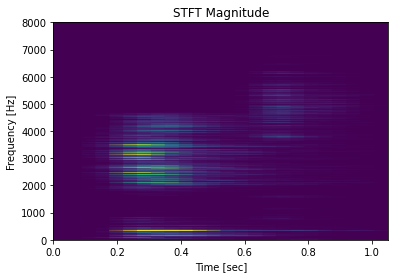

In [ ]:
# plot STFT
amp = 2 * np.sqrt(2)
plt.pcolormesh(t, f, np.abs(s), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
# we see a clear separation in consonants and vowels:
# vowels: 0.2-0.6 seconds
# consonants: 0.7-0.9 seconds

In [ ]:
# find ratio between high and low frequencies
# consonants have primarily higher frequencies and lower energy content than vowels

ratios = []
# 0 - 4000 Hz, 4000 - 8000
# filter 3000 or 2000 below for consonants
# The average duration of a segment is 60-70 ms in unstressed syllables and 100-150 ms is stressed
sum = np.sum(abs(s))
print(sum)
for i in range(len(s)):
  bound1 = int(3000*len(s[i])/8000)
  bound2 = int(3000*len(s[i])/8000)
  low_freq = np.sum(abs(s[i][0:bound1])) # sum of low frequency components (vowels)
  high_freq = np.sum(abs(s[i][bound2:len(s[i])-bound2])) # sum of high frequency components (consonants)
  ratio = low_freq / high_freq
  ratios.append(ratio)
  #ratios.append(np.sum(abs(s[i]))) # hard to differentiate between consonants and no sound...

print(ratios[0:int(0.1*len(ratios))])
print(ratios[int(0.3*len(ratios)):int(0.5*len(ratios))])
print(ratios[int(0.7*len(ratios)):int(0.8*len(ratios))])
# we observe that the ratio is noticeably higher during vowel periods
# and lower for consonant periods

1523.9255281067137
[0.3759010425337582, 0.39964654397229543, 0.16222087087261386, 0.2721901509768031, 0.5632183772832984, 1.5983947379587684, 0.8139147338322866, 0.38208810229908713, 0.41911057295472326, 0.8304632136760344, 0.9374173726587148, 0.8212923302543566, 0.3216949906744415, 0.21883273790526034, 0.48933071064162154, 0.6398634430575019, 1.1811020109775205, 2.7695019290763843, 3.875133365745076, 5.970870355796026, 4.690383967805285, 2.2883379299329674, 2.079239417642527, 1.1407473126662344, 0.4477904297164866, 0.5212909349439284, 0.3498294753987916, 0.14637659577609186, 0.15075318197053061, 0.13047420910677, 0.020102944874955172, 0.14035006458450644, 0.2876650253910693, 0.5045590287972752, 0.38429391272736213, 0.14840124184822015, 0.28482705701028943, 0.496565257644738, 0.3744986331512475, 0.12613174413639125, 0.2879849891749259, 0.4782510781697194, 0.383053841535914, 0.2577112429173289, 0.1444696275458142, 0.19361341074884958, 0.12676817614503832, 0.45482458596180503, 0.35929755

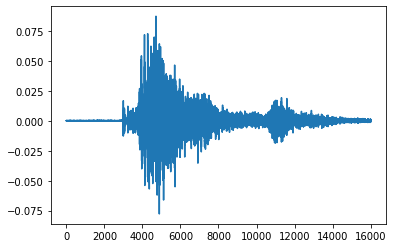

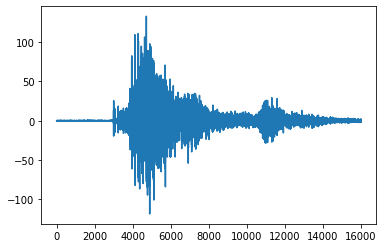

In [ ]:
#compute istft to make sure that the signal is properly reconstructed
x, t = signal.istft(s, fs, window='hann', nperseg=window_size, nfft=window_size)
fig = plt.figure(1)
#istft reconstructed signal
plt.plot(t[0:16000])
fig = plt.figure(2)
#original signal
plt.plot(all_reverb_signals[0])

In [ ]:
# we now perform our method over all samples

# set window size
window_size = int(fs * 0.35 / 2) # 350 ms
print(window_size)
#take stft
stfts = []
for i in range(len(all_reverb_signals)):
  _,_,s = signal.stft(all_reverb_signals[i], fs, window='hann', nperseg=window_size, nfft=window_size)
  stfts.append(s)

2800


In [ ]:
# take ratio of low freq / high
for i in range(len(stfts)):
  for j in range(len(stfts[i])):
    bound = int(3000*len(stfts[i][j])/8000) # 4000?
    low_freq = np.sum(abs(stfts[i][j][0:bound]))
    high_freq = np.sum(abs(stfts[i][j][bound:len(stfts[i][j])-bound]))
    ratio = low_freq / high_freq
    if ratio < 0.05: #amplify consonants for consonant regions
      bound2 = int(4000*len(stfts[i][j])/8000)
      stfts[i][j][bound:len(stfts[i][j])-bound] = 3 * stfts[i][j][bound:len(stfts[i][j])-bound]
      #stfts[i][j][0:bound2] = 0.25 * stfts[i][j][0:bound2] # attenuate low frequencies for consonants


In [ ]:
# reconstruct signals using istft
new_signals = []
for i in range(len(stfts)):
  _, x = signal.istft(stfts[i], fs, window='hann', nperseg=window_size, nfft=window_size)
  x = x[0:16000] # append to original size
  new_signals.append(x)


In [ ]:
# test model
X_sig_rev=np.vstack(new_signals)
X_sig_rev=X_sig_rev.reshape(X_sig_rev.shape[0],X_sig_rev.shape[1],1)
print(X_sig_rev.shape)
model_e2e.evaluate(X_sig_rev, y_trial) # 0.5635 -> 0.5803

(2552, 16000, 1)
80/80 [==============================] - 5s 62ms/step - loss: 1.7293 - accuracy: 0.5803


[1.7292641401290894, 0.580329179763794]

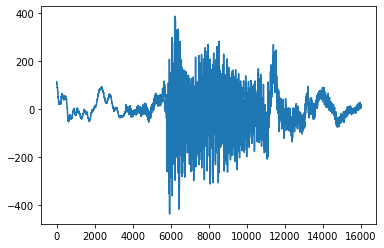

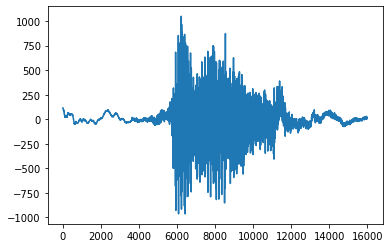

In [ ]:
# plot figures for debugging purposes
figure = plt.figure(1)
plt.plot(all_reverb_signals[500])
figure = plt.figure(2)
plt.plot(new_signals[500])

In [ ]:
IPython.display.Audio(all_reverb_signals[1000], rate=fs)

In [ ]:
IPython.display.Audio(new_signals[1000], rate=fs)